In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
%matplotlib inline
pd.get_option("display.max_columns")

0

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

In [14]:
import warnings
warnings.filterwarnings('ignore')

**Задание на ЛР 1**

Разработать программу на языке Python, генерирующую набор данных, удовлетворяющих условию варианта. Для всех вариантов: данные двумерные (используются только два признака). Классификатор – логистическая регрессия (информация в методичке). Разбиение выборки 50%/50% (половина данных используется для обучения классификатора, половина для оценки ошибки классификации)

Результаты, которые необходимо получить в итоге:
1. Параметры генерации данных.
2. Графическое представления расположения набора данных (двумерный график, в котором каждый класс обозначен своим цветом).
3. Матрицу ошибок.
4. Значение точности классификации.
Порядок выполнения

**Вариант 45:** 

* N (количество классов): 6
* M (количество элементов в классе): 766
* Диапазон значений точности:
** R_min: 0.722
** R_max: 0.735

In [15]:
N, M, R_min, R_max = 6, 766*6, .722, .735

# Генерация данных: 

параметры, дающие значение accuraccy = 0.723: 
- n_samples = 766 (количество элементов всего, 766*6);
- centers = 6 (количество классов);
- n_features=2 (количество признаков);
- cluster_std = 1.85 (Стандартное отклонение кластеров);
- random_state=0 (для фиксации).

In [16]:
# Генерация шести классов, каждый из которых представим в виде двух признаков
 
X, y = make_blobs(n_samples=M, centers=N, n_features=2,
                  cluster_std = 1.85,
                   random_state=0)
 
# first_feature, second_feature - признаки; target_value - метка класса
columns = {'first_feature': X[:, 0], 'second_feature': X[:, 1], 'target_value': y}
data = pd.DataFrame(data = columns)
data.head(10)

,first_feature,second_feature,target_value
0,4.004131,-0.144641,1
1,4.992626,-0.292363,1
2,1.886424,0.154758,1
3,-0.308680,4.026963,0
4,0.931267,2.938430,0
5,-1.136299,2.435678,2
6,-1.267973,5.967928,2
7,1.962615,-0.663025,1
8,8.254345,1.987171,5
9,1.084495,-1.665100,1


In [17]:
data.shape

(4596, 3)

Количество элементов в каждом классе:

In [23]:
data['target_value'].value_counts().sort_values()

3    766
2    766
5    766
1    766
4    766
0    766
Name: target_value, dtype: int64

# Графическое представление данных:

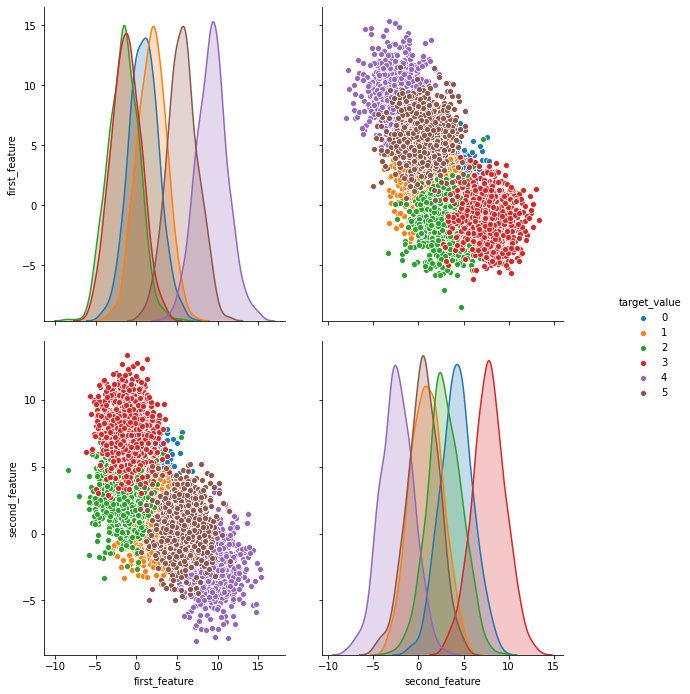

In [18]:
g = sns.pairplot(data, hue='target_value')
g.fig.set_size_inches(10,10)

# Применение логистической регрессии:

In [19]:
#  разбивка на train-test
 
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['target_value']), data['target_value'], test_size = 0.5, random_state = 42)

In [20]:
# логистическая регрессия
 
clf = LogisticRegression()
clf.fit(X_train, y_train)
 
predictions = clf.predict(X_test)

# Оценка качества результата:

- построение матрицы ошибок;
- значение точность классификации.

In [21]:
# матрица ошибок
 
confusion_matrix(y_test, predictions)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.55      0.62      0.59       344
           1       0.65      0.60      0.63       392
           2       0.69      0.65      0.67       392
           3       0.80      0.84      0.82       392
           4       0.91      0.89      0.90       410
           5       0.72      0.73      0.73       368

    accuracy                           0.73      2298
   macro avg       0.72      0.72      0.72      2298
weighted avg       0.73      0.73      0.73      2298



In [22]:
# значение точности классификации:
 
print('диапазон точности: ', R_min, ' - ', R_max)
print('accuracy = ', accuracy_score(y_test, predictions))

диапазон точности:  0.722  -  0.735
accuracy =  0.7254134029590948
